In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

        x  y
0   1.677  0
1   1.699  0
2   1.700  0
3   1.702  0
4   1.704  0
5   1.706  0
6   1.708  0
7   1.710  0
8   1.712  0
9   1.727  0
10  1.767  1
11  1.810  1
12  1.822  1
13  1.826  1
14  1.868  1
15  1.873  1
16  1.820  1
17  1.830  1
18  1.840  1
19  1.850  1


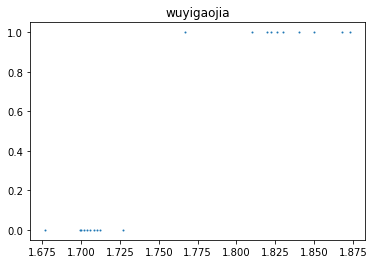

In [2]:
data=pd.read_csv(r'E:\OneDrive\桌面\4.17 2022数模大作业\B题  共享汽车运营策略探讨\3.csv')
print(data)
plt.scatter(data['x'],data['y'],s=1)
plt.title('wuyigaojia')
plt.savefig('dingjia')
plt.show()

In [3]:
data.describe()

,x,y
count,20.000000,20.000000
mean,1.767550,0.500000
std,0.068543,0.512989
min,1.677000,0.000000
25%,1.705500,0.000000
50%,1.747000,0.500000
75%,1.827000,1.000000
max,1.873000,1.000000


训练集数据大小为 16 16
测试集数据大小为 4 4


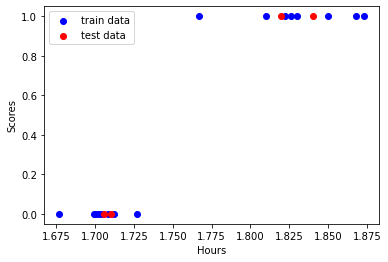

In [4]:
#1.拆分训练集和测试集
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

exam_X=data['x']
exam_y=data['y']
exam_X=exam_X.values.reshape(-1,1)
exam_y=exam_y.values.reshape(-1,1)
train_X,test_X,train_y,test_y=train_test_split(exam_X,exam_y,train_size=0.8)
print('训练集数据大小为',train_X.size,train_y.size)
print('测试集数据大小为',test_X.size,test_y.size)

#2.散点图观察
plt.scatter(train_X,train_y,color='b',label='train data')
plt.scatter(test_X,test_y,color='r',label='test data')
#plt.plot(test_X,pred_y,color='r')
plt.legend(loc=2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


1.0
1.41
[[0.54446941 0.45553059]]
[0]
1.42
[[0.54323072 0.45676928]]
[0]
1.43
[[0.54199151 0.45800849]]
[0]
1.44
[[0.54075177 0.45924823]]
[0]
1.45
[[0.53951153 0.46048847]]
[0]
1.46
[[0.5382708 0.4617292]]
[0]
1.47
[[0.53702959 0.46297041]]
[0]
1.48
[[0.53578792 0.46421208]]
[0]
1.49
[[0.53454582 0.46545418]]
[0]
1.5
[[0.53330328 0.46669672]]
[0]
该模型对应的回归函数为:1/(1+exp-(-0.882381+0.499314*x))


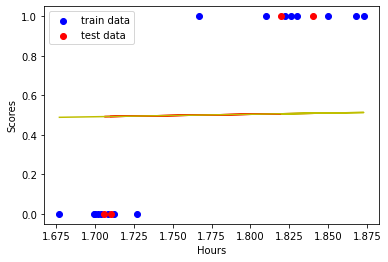

In [5]:
# 导入模型
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
# 训练模型
modelLR.fit(train_X,train_y)
# 模型评分（即准确率）
modelLR.score(test_X,test_y)
print(modelLR.score(test_X,test_y))
#里程数确定时，预测费用
#先求出回归函数y=a+bx，再代入逻辑函数中pred_y=1/(1+np.exp(-y))
b=modelLR.coef_
a=modelLR.intercept_
m=1.4
for i in range(10):
    m=m+0.1/10
    print(m)
    print(modelLR.predict_proba([[m]]))
    print(modelLR.predict([[m]]))
print('该模型对应的回归函数为:1/(1+exp-(%f+%f*x))'%(a,b))
#画出相应的逻辑回归曲线
plt.scatter(train_X,train_y,color='b',label='train data')
plt.scatter(test_X,test_y,color='r',label='test data')
plt.plot(test_X,1/(1+np.exp(-(a+b*test_X))),color='r')
plt.plot(exam_X,1/(1+np.exp(-(a+b*exam_X))),color='y')
plt.legend(loc=2)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [6]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
#数值处理
pred_y=1/(1+np.exp(-(a+b*test_X)))
pred_y=pd.DataFrame(pred_y)
pred_y=round(pred_y,0).astype(int)
#混淆矩阵
confusion_matrix(test_y.astype(str),pred_y.astype(str))


array([[2, 0],
       [0, 2]], dtype=int64)

<Figure size 432x288 with 0 Axes>

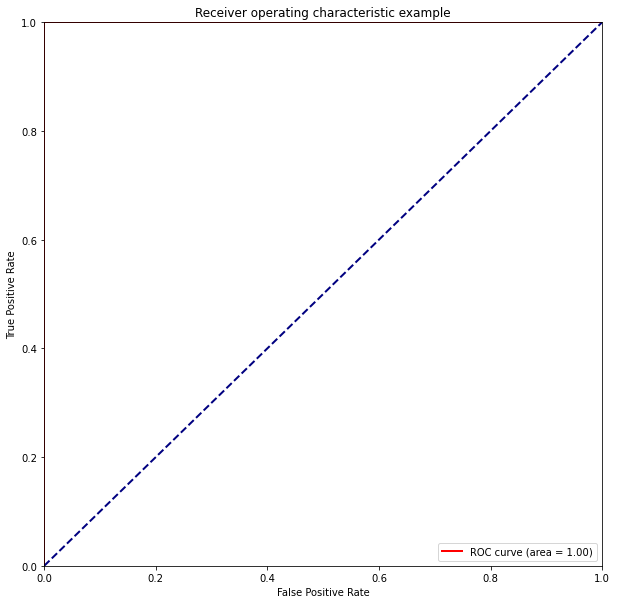

In [7]:
# 绘制模型ROC曲线
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(test_y, pred_y) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='r',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
